In [5]:
import json
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib
from sklearn import manifold, datasets
import json


Using matplotlib backend: Qt5Agg


In [2]:
with open("instances_train.json",'r') as instances_train:
    instances_train_dict = json.load(instances_train)

categories_dict = {}
for i in instances_train_dict['categories']:
    categories_dict[i['id']]=i['name']
images=instances_train_dict['images']
annotations = instances_train_dict['annotations']

Using matplotlib backend: Qt5Agg


In [3]:
instances_train_dict.keys()

dict_keys(['images', 'categories', 'annotations'])

In [18]:
categories_dict = {}
for i in instances_train_dict['categories']:
    categories_dict[i['id']]=i['name']
#categories_dict = sorted(categories_dict.items(), key=lambda x: x[1], reverse=False)
print(categories_dict)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'kite', 33: 'baseball bat', 34: 'baseball glove', 35: 'skateboard', 36: 'surfboard', 37: 'tennis racket', 38: 'bottle', 39: 'wine glass', 40: 'cup', 41: 'fork', 42: 'knife', 43: 'spoon', 44: 'bowl', 45: 'banana', 46: 'apple', 47: 'sandwich', 48: 'orange', 49: 'broccoli', 50: 'carrot', 51: 'hot dog', 52: 'pizza', 53: 'donut', 54: 'cake', 55: 'chair', 56: 'couch', 57: 'potted plant', 58: 'bed', 59: 'dining table', 60: 'toilet', 61: 'tv', 62: 'laptop', 63: 'mouse', 64: 'remote', 65: 'keyboard', 66: 'cell phone', 67: 'microwave', 68: 'oven', 6

In [21]:
images=instances_train_dict['images']
len(images)

142037

In [20]:
images[0]

{'file_name': 'img_00023748.jpg', 'height': 512, 'id': 23748, 'width': 683}

In [23]:
all_images_list = []
ratio_num=[0,0,0,0,0]
ratios = []
for image in images:
    all_images_list.append(image['id'])
    ratio = image['width']/image['height']
    ratios.append(ratio)
    if ratio >2 :
        ratio_num[4]+=1
    elif ratio >1.5 and ratio <=2:
        ratio_num[3]+=1
    elif ratio > 1 and ratio <=1.5:
        ratio_num[2]+=1
    elif ratio > 0.5 and ratio <=1:
        ratio_num[1]+=1
    elif ratio <=0.5:
        ratio_num[0]+=1
        
        

In [28]:
ratio_num

[91, 29804, 84229, 26881, 1032]

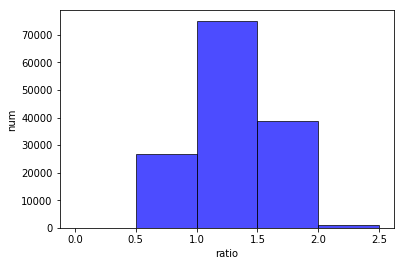

In [27]:
import matplotlib.pyplot as plt
group = [0.0,0.5,1.0,1.5,2.0,2.5,]
plt.hist(ratios, group, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("ratio")
# 显示纵轴标签
plt.ylabel("num")
# 显示图标题
plt.show()


In [3]:
annotations = instances_train_dict['annotations']
print(len(annotations))
annotations[0]

860491


{'area': 172517.9061676068,
 'bbox': [0.1479492061, 222.2470703104, 595.7814941417, 289.56573486080003],
 'category_id': 58,
 'id': 0,
 'image_id': 23748,
 'iscrowd': 0}

In [6]:
class_boxnum = {}#统计每个class的box数目
class_image={}#统计每个class所在图片
box_per_image=[]
for annotation in annotations:
    #统计每个class的box数目
    if categories_dict[annotation['category_id']] not in class_boxnum:
        class_boxnum[categories_dict[annotation['category_id']]] = 1
    else:
        class_boxnum[categories_dict[annotation['category_id']]] += 1
    #统计每个class所在图片
    if categories_dict[annotation['category_id']] not in class_image:
        class_image[categories_dict[annotation['category_id']]] = set()
        class_image[categories_dict[annotation['category_id']]].add(annotation['image_id'])
    else:
        class_image[categories_dict[annotation['category_id']]].add(annotation['image_id'])

class_imagenum={}#统计每个class的图片数
for key in class_image.keys():
    class_imagenum[key]=len(class_image[key])
sorted(class_imagenum.items(),key=lambda x:x[1])        


In [14]:
with open('class_image.txt','w') as f:
    for i in class_image.items():
        f.write(str(i))
        f.write('\n')
f.close()

In [ ]:
sorted(class_box.items(),key=lambda x:x[1])

In [7]:
#读coco词向量
coconame = []
with open('coconames.txt','r') as name:
    for line in name.readlines():
        coconame.append(line.replace('\n',''))
coco_w2v = np.loadtxt('coco_word_w2v.txt',dtype='float32', delimiter=',')
cocodict = {}
for i ,name in enumerate(coconame):
    cocodict[name] = coco_w2v[:,i]

In [9]:
#coco顺序转化为之江顺序
zjname = []
with open('zjnames.txt','r') as name:
    for line in name.readlines():
        zjname.append(line.replace('\n',''))
zjw2v = []
for i ,name in enumerate(zjname):
    zjw2v.append(cocodict[name])
zjw2v = np.around(zjw2v, decimals=6)

In [10]:
zjw2v.shape

(80, 300)

In [23]:

np.savetxt('zjw2v.txt',zjw2v.T,fmt="%.6f",delimiter=',')

In [14]:
emebdd = []
label = []
for i in cocodict.items():
    key , value = i
    label.append(key)
    emebdd.append(value)
    
X = np.array(emebdd)
'''t-SNE'''
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
result = tsne.fit_transform(X)  # 转换后的输出
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))  # 算法用时
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
 
    fig = plt.figure(figsize=(10, 10))
    #ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i][:6]),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig
fig = plot_embedding(result, label, 't-SNE embedding')
plt.show(fig)

t-SNE: 0.46 sec


In [9]:
min_side = []
max_side = []
for image in images:
    height = image['height']
    width = image["width"]
    if height > width:
        min_side.append(width)
        max_side.append(height)
    else:
        min_side.append(height)
        max_side.append(width)
group = [300,350,400,450,500,600,]
plt.hist(min_side,group,  facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("min_side")
# 显示纵轴标签
plt.ylabel("num")
# 显示图标题
plt.show()    